In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Data Preprocessing

#### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


#### Validation Image Preprocessing

In [3]:
validation_Set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[159. 153. 157.]
   [148. 142. 146.]
   [138. 132. 136.]
   ...
   [114. 106. 104.]
   [127. 119. 117.]
   [120. 112. 110.]]

  [[156. 150. 154.]
   [118. 112. 116.]
   [150. 144. 148.]
   ...
   [117. 109. 107.]
   [128. 120. 118.]
   [120. 112. 110.]]

  [[169. 163. 167.]
   [145. 139. 143.]
   [184. 178. 180.]
   ...
   [121. 113. 111.]
   [125. 117. 115.]
   [115. 107. 105.]]

  ...

  [[162. 157. 161.]
   [162. 157. 161.]
   [162. 157. 161.]
   ...
   [ 47.  44.  11.]
   [ 91.  86.  64.]
   [148. 143. 124.]]

  [[165. 160. 164.]
   [164. 159. 163.]
   [163. 158. 162.]
   ...
   [ 54.  51.  18.]
   [ 70.  65.  43.]
   [119. 114.  95.]]

  [[166. 161. 165.]
   [166. 161. 165.]
   [165. 160. 164.]
   ...
   [ 70.  67.  34.]
   [ 56.  51.  29.]
   [ 67.  62.  43.]]]


 [[[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]

  [[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.  

## Building Model

In [40]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import models, layers, optimizers


In [41]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [42]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [47]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [48]:
cnn.add(tf.keras.layers.Flatten())

In [49]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [50]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [51]:
# Output layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compilation Model

In [55]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [56]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │      27,649,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,418,762 (123.67 MB)

 Trainable params: 32,418,762 (123.67 MB)

 Non-trainable params: 0 (0.00 B)

### Training Model

In [57]:
training_history = cnn.fit(x=training_set,validation_data=validation_Set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 11135s 5s/step - accuracy: 0.6812 - loss: 1.0914 - val_accuracy: 0.8936 - val_loss: 0.3309
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9577s 4s/step - accuracy: 0.9030 - loss: 0.3062 - val_accuracy: 0.9306 - val_loss: 0.2172
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9632s 4s/step - accuracy: 0.9421 - loss: 0.1815 - val_accuracy: 0.9491 - val_loss: 0.1564
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 10569s 5s/step - accuracy: 0.9609 - loss: 0.1181 - val_accuracy: 0.9595 - val_loss: 0.1317
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9817s 4s/step - accuracy: 0.9713 - loss: 0.0878 - val_accuracy: 0.9538 - val_loss: 0.1593
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 10019s 5s/step - accuracy: 0.9760 - loss: 0.0753 - val_accuracy: 0.9689 - val_loss: 0.1056
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 11227s 5s/step - accuracy: 0.9798 - loss: 0.0625 - val_accuracy: 0.9590 - val_loss: 0.1393
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 10280s 5s/step - accuracy: 0.9

### Model evaluation

In [62]:
train_loss,train_acc = cnn.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1750s 795ms/step - accuracy: 0.9965 - loss: 0.0113


In [63]:
print(train_loss,train_acc)

0.01131934579461813 0.9965289235115051


In [65]:
# Model on Validation set

val_loss,val_acc = cnn.evaluate(validation_Set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 440s 798ms/step - accuracy: 0.9733 - loss: 0.0957


In [66]:
print(val_loss,val_acc)

0.09572714567184448 0.9733098149299622


### Saving Model

In [67]:
cnn.save("trained_model.h5")

In [68]:
cnn.save("trained_model.keras")

In [70]:
training_history.history

{'accuracy': [0.6811580061912537,
  0.9030229449272156,
  0.9420584440231323,
  0.960850715637207,
  0.9713066220283508,
  0.9759727120399475,
  0.9797852039337158,
  0.9828295111656189,
  0.9856461882591248,
  0.9865424036979675],
 'loss': [1.0913892984390259,
  0.30623090267181396,
  0.18145215511322021,
  0.11813393235206604,
  0.08777284622192383,
  0.07530568540096283,
  0.06251667439937592,
  0.054144810885190964,
  0.04459609091281891,
  0.0418243445456028],
 'val_accuracy': [0.8935806751251221,
  0.9306282997131348,
  0.9491236209869385,
  0.959537923336029,
  0.9538470506668091,
  0.9688709378242493,
  0.9589688181877136,
  0.9647734761238098,
  0.9622695446014404,
  0.9733098149299622],
 'val_loss': [0.33088719844818115,
  0.21723930537700653,
  0.1563507616519928,
  0.13172975182533264,
  0.15926124155521393,
  0.1055893748998642,
  0.1392674297094345,
  0.11895979940891266,
  0.140848308801651,
  0.09572712332010269]}

In [73]:
# Recording History in json

import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

In [75]:
training_history.history['accuracy']

[0.6811580061912537,
 0.9030229449272156,
 0.9420584440231323,
 0.960850715637207,
 0.9713066220283508,
 0.9759727120399475,
 0.9797852039337158,
 0.9828295111656189,
 0.9856461882591248,
 0.9865424036979675]

### Accuracy Visulization


<function matplotlib.pyplot.show(close=None, block=None)>

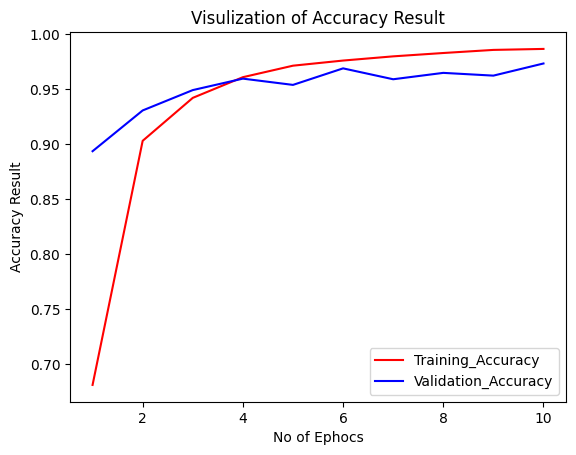

In [80]:
epochs = [i for i in range(1,11)]
epochs
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training_Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation_Accuracy')
plt.xlabel("No of Ephocs")
plt.ylabel("Accuracy Result")
plt.title("Visulization of Accuracy Result")
plt.legend()
plt.show

### Class Name Extract

In [84]:
class_name = validation_Set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_